In [1]:
#Blob Detection using Scikit-Image
#Sheekar Banerjee (AI Engineering Lead and Researcher)



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from tqdm import tqdm

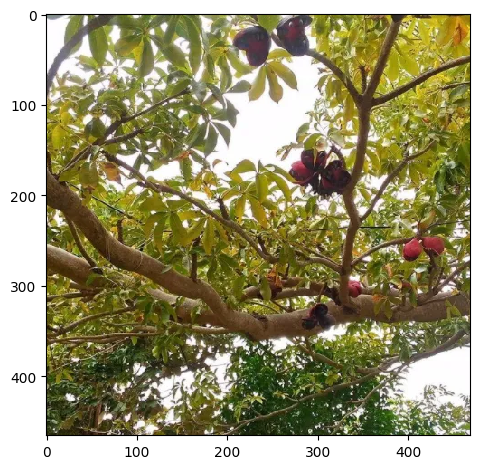

In [2]:
tree = imread('tree.png')
imshow(tree);

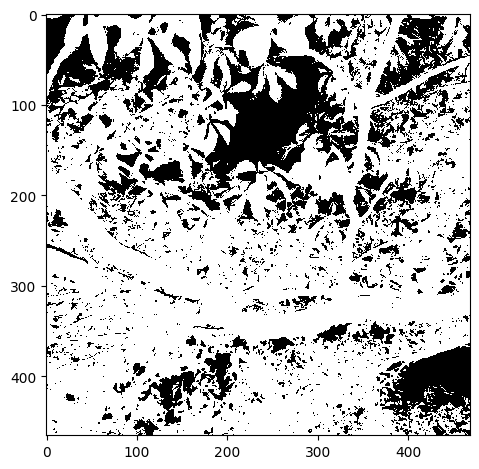

In [3]:
tree_gray = rgb2gray(tree)
otsu_thresh = threshold_otsu(tree_gray)
tree_binary = tree_gray < otsu_thresh
imshow(tree_binary, cmap = 'gray');

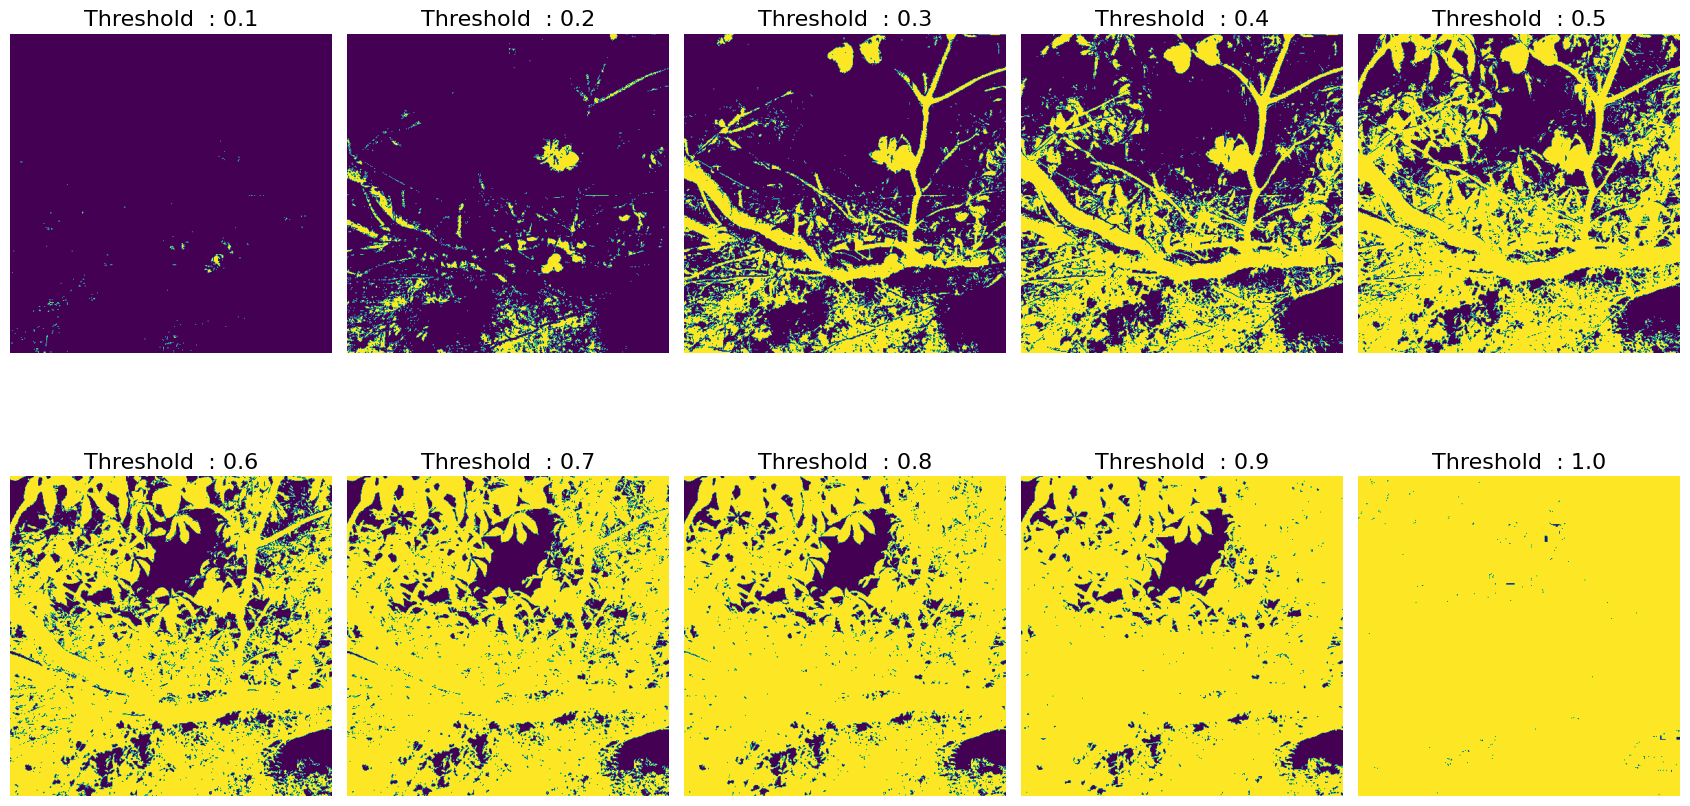

In [6]:
def threshold_checker(image):
    thresholds =  np.arange(0.1,1.1,0.1)
    tree_gray = rgb2gray(image)
    fig, ax = plt.subplots(2, 5, figsize=(17, 10))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Threshold  : {round(thresholds[n],2)}',
                       fontsize = 16)
        threshold_tree = tree_gray < thresholds[n]
        ax.imshow(threshold_tree);
        ax.axis('off')
    fig.tight_layout()
threshold_checker(tree)

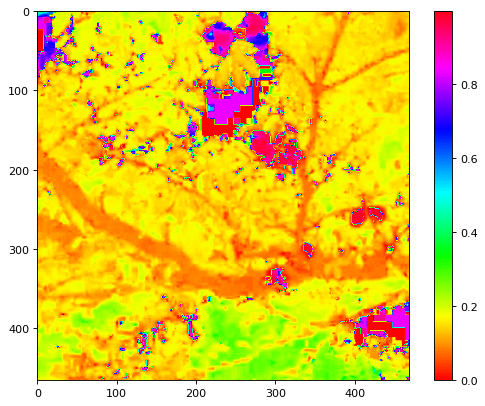

In [8]:
tree_hsv = rgb2hsv(tree[:,:,:])
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(tree_hsv[:,:,0], cmap='hsv')
plt.colorbar();

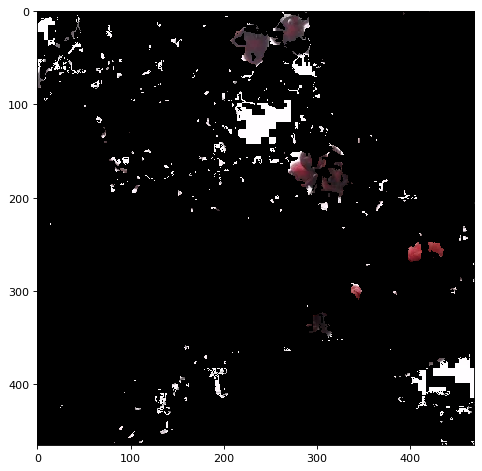

In [9]:
lower_mask = tree_hsv [:,:,0] > 0.80
upper_mask = tree_hsv [:,:,0] <= 1.00
mask = upper_mask*lower_mask
red = tree[:,:,0]*mask
green = tree[:,:,1]*mask
blue = tree[:,:,2]*mask
tree_mask = np.dstack((red,green,blue))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(tree_mask);

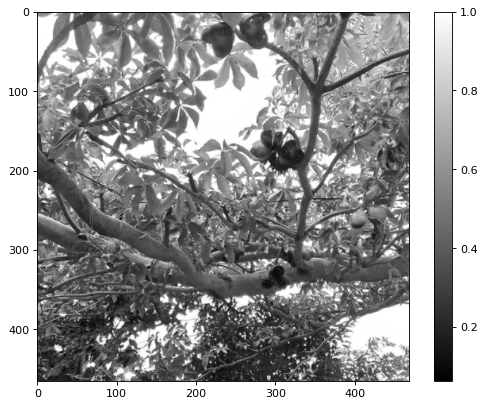

In [11]:
tree_hsv = rgb2hsv(tree[:,:,:])
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(tree_hsv[:,:,2], cmap='gray')
plt.colorbar();

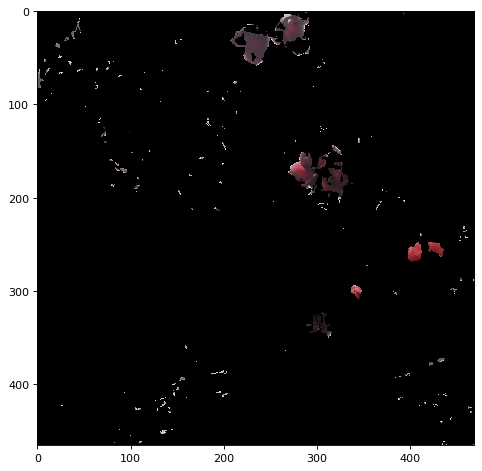

In [12]:
lower_mask = tree_hsv [:,:,0] > 0.80
upper_mask = tree_hsv [:,:,0] <= 1.00
value_mask = tree_hsv [:,:,2] < .90
mask = upper_mask*lower_mask*value_mask
red = tree[:,:,0] * mask
green = tree[:,:,1] * mask
blue = tree[:,:,2] * mask
tree_mask = np.dstack((red, green, blue))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(tree_mask);

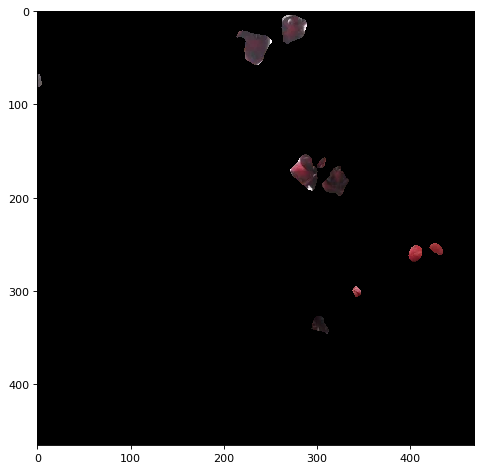

In [13]:
lower_mask = tree_hsv [:,:,0] > 0.80
upper_mask = tree_hsv [:,:,0] <= 1.00
value_mask = tree_hsv [:,:,2] < .90
mask = median_filter(upper_mask*lower_mask*value_mask, 10)
red = tree[:,:,0] * mask
green = tree[:,:,1] * mask
blue = tree[:,:,2] * mask
tree_mask = np.dstack((red, green, blue))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(tree_mask);

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


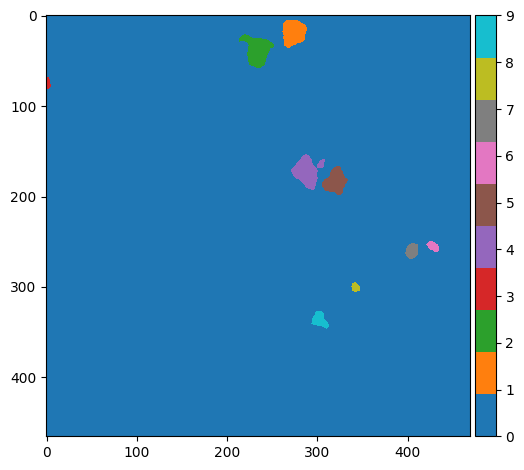

In [14]:
tree_blobs = label(rgb2gray(tree_mask) > 0)
imshow(tree_blobs, cmap = 'tab10');


In [16]:
properties =['area','bbox','convex_area','bbox_area',
             'major_axis_length', 'minor_axis_length',
             'eccentricity']
df = pd.DataFrame(regionprops_table(tree_blobs, properties = properties))

100%|██████████| 9/9 [00:00<00:00, 516.73it/s]


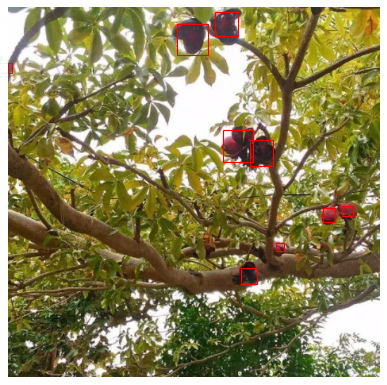

In [17]:
blob_coordinates = [(row['bbox-0'],row['bbox-1'],
                     row['bbox-2'],row['bbox-3'] )for
                    index, row in df.iterrows()]
fig, ax = plt.subplots(1,1, figsize=(8, 6), dpi = 80)
for blob in tqdm(blob_coordinates):
    width = blob[3] - blob[1]
    height = blob[2] - blob[0]
    patch = Rectangle((blob[1],blob[0]), width, height,
                       edgecolor='r', facecolor='none')
    ax.add_patch(patch)
ax.imshow(tree);
ax.set_axis_off()


In [19]:
df = df[df['eccentricity'] < df['eccentricity'].max()]
print(df)

   area  bbox-0  bbox-1  bbox-2  bbox-3  convex_area  bbox_area  \
0   652       5     261      36     289          693        868   
1   796      21     213      59     252          969       1482   
3   793     154     271     194     309          989       1520   
4   567     167     305     199     334          624        928   
6   205     252     397     270     412          214        270   
7    75     296     337     307     347           80        110   
8   230     328     293     348     313          268        400   

   major_axis_length  minor_axis_length  eccentricity  
0          30.978146          27.628704      0.452278  
1          38.762339          30.765201      0.608325  
3          36.736228          32.686795      0.456409  
4          30.588814          25.138291      0.569757  
6          18.385942          14.201115      0.635149  
7          11.028209           8.698481      0.614716  
8          21.657615          15.179390      0.713279  


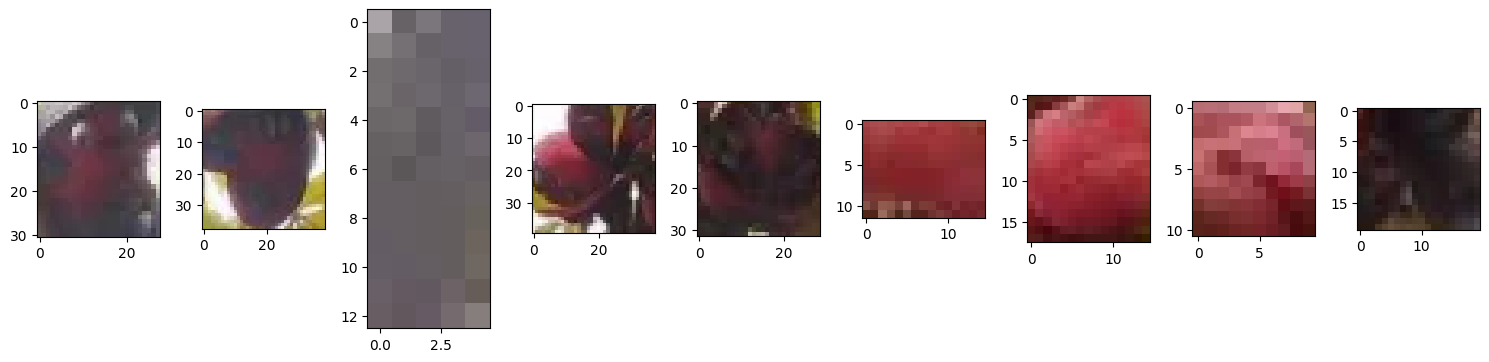

In [20]:
fig, ax = plt.subplots(1, len(blob_coordinates), figsize=(15,5))
for n, axis in enumerate(ax.flatten()):
    axis.imshow(tree[int(blob_coordinates[n][0]):
                     int(blob_coordinates[n][2]),
                     int(blob_coordinates[n][1]):
                     int(blob_coordinates[n][3])]);

fig.tight_layout()